In [1]:
from functional import *
plt.rc('figure',titleweight='bold',titlesize='large',figsize=(15,6))
plt.rc('axes',titleweight='bold',titlesize='large',labelweight='bold',labelsize='large',grid=True)

2024-09-25 22:52:50.202613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 22:52:50.215829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 22:52:50.219624: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-25 22:52:50.231304: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 22:52:51.100868: W tensorflow/compiler/tf2

In [2]:
class timeseries_lstm(funtional):
    def __init__(self):
        super().__init__()
    def build(self,epochs=10,optimizer='adam',loss='mae',activation='leaky_relu',batch_size=32):

        self.model=tf.keras.Sequential([
            tf.keras.layers.Input((self.seq_length,1)),
            tf.keras.layers.LSTM(1),
            tf.keras.layers.Dense(500,activation=activation),
            tf.keras.layers.LayerNormalization(),
            tf.keras.layers.Dense(200,activation=activation),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(100,activation=activation),
            tf.keras.layers.LayerNormalization(),
            tf.keras.layers.Dense(50,activation=activation),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(20,activation=activation),
            tf.keras.layers.LayerNormalization(),
            tf.keras.layers.Dense(10,activation=activation),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(1)
        ])
        self.model.compile(optimizer=optimizer,loss=loss)
        best_lost=tf.keras.callbacks.ModelCheckpoint(os.path.join(Path().cwd(),f'models/lstm_{self.price_type}_{self.symbol}_{self.timeframe}.keras'),monitor='loss',mode='min',save_best_only=True)
        self.history=self.model.fit(self.x_train,self.y_train,epochs=epochs,batch_size=batch_size,callbacks=[best_lost],validation_data=(self.x_test,self.y_test))
        self.pred=self.model.predict(self.x_test)

In [3]:
model=timeseries_lstm()

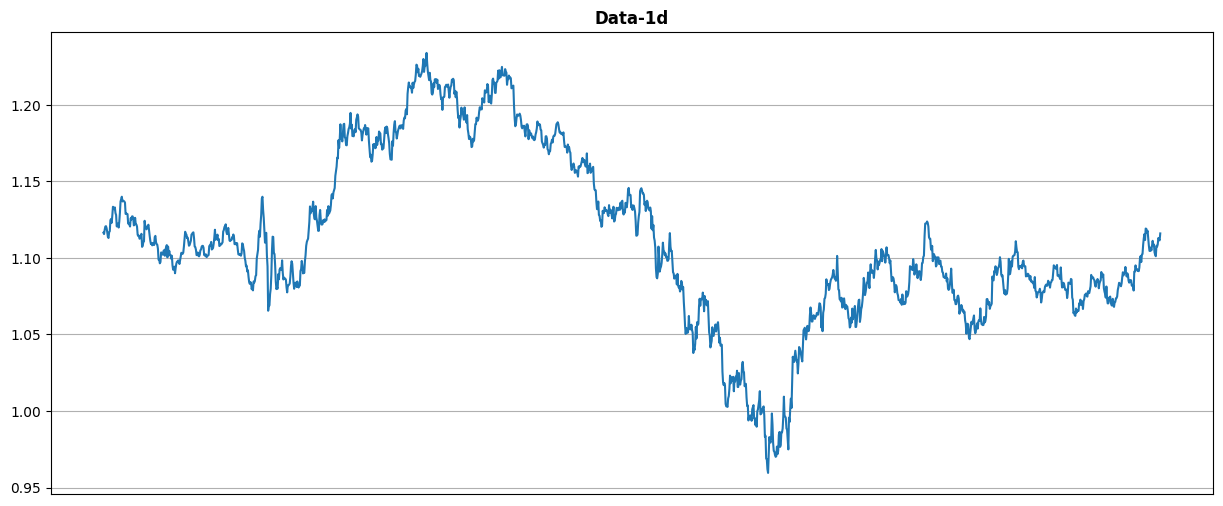

In [4]:
model.plot_data()

In [5]:
model.build(epochs=100,loss='mape')

Epoch 1/100


2024-09-25 22:52:53.008551: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 57.0695 - val_loss: 4.4870
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.9061 - val_loss: 2.4981
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.5198 - val_loss: 2.8817
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.4853 - val_loss: 8.0893
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.3428 - val_loss: 2.6095
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.7150 - val_loss: 7.2761
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.3486 - val_loss: 1.5517
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.3311 - val_loss: 1.2295
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.4421 - val_loss: 1.6423
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.4550 - val_loss: 1.3791
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0016 - val_loss: 1.1365
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.

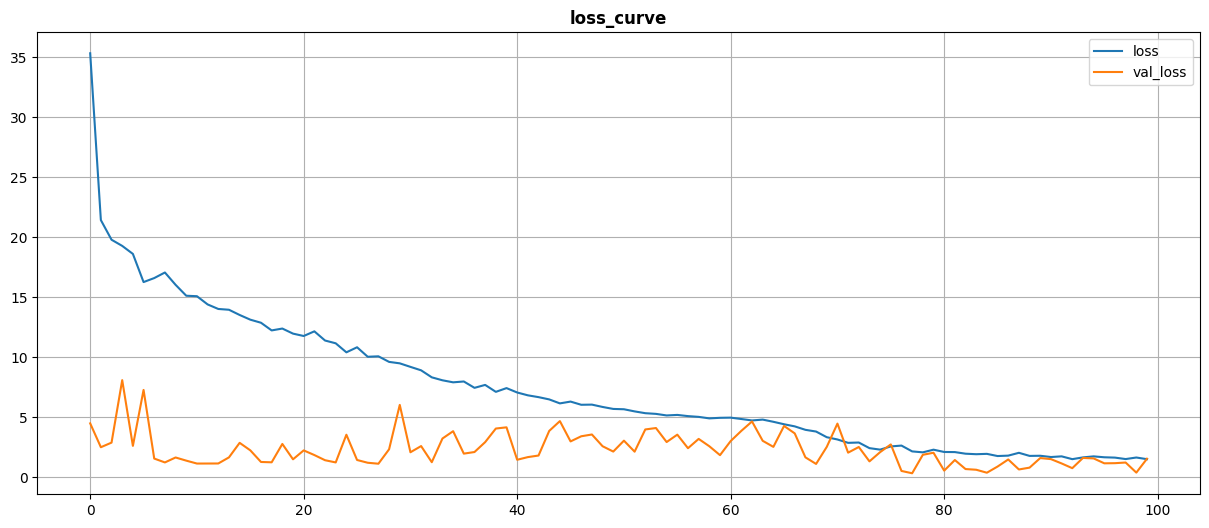

In [6]:
model.plot_history()